## Data Reading

In [ ]:
import os
zip_path = '/content/archive.zip'

extract_path = '/content/OCR_data'

if not os.path.exists(extract_path):
    os.makedirs(extract_path)

In [ ]:
print(zip_path, os.path.isfile(zip_path))

/content/archive.zip True


In [ ]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f'Contents extracted to: {extract_path}')

Contents extracted to: /content/OCR_data


In [ ]:
path = 'OCR_data'
dir_list = os.listdir(path)

In [ ]:
dir_list = list(set([*map(lambda x: x.split(".")[0],dir_list)]))
len(dir_list)

19992

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Reading Dataset images and Labels into lists
X = []
y = []
for i in dir_list:
    image_dir = os.path.join(path, i) + ".jpg"
    txt_dir = os.path.join(path, i) + ".txt"
    X.append(cv2.cvtColor(cv2.imread(image_dir), cv2.COLOR_BGR2RGB))
    y.append(open(txt_dir, 'r').read())

In [ ]:
#Function to display Images
import math

def display_images(images, titles=None):
    """
    Display a list of images.

    Parameters:
    images (list): List of images as NumPy arrays.
    titles (list): List of titles for the images (optional).
    """
    num_images = len(images)
    if titles and len(titles) != num_images:
        raise ValueError("The length of titles must match the number of images.")

    cols = 5
    rows = math.ceil(num_images / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(15, 1 * rows))
    axes = axes.flatten()

    for ax in axes[num_images:]:
        ax.axis('off')

    for i, img in enumerate(images):
        ax = axes[i]
        ax.imshow(img)
        if titles:
            ax.set_title(titles[i])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

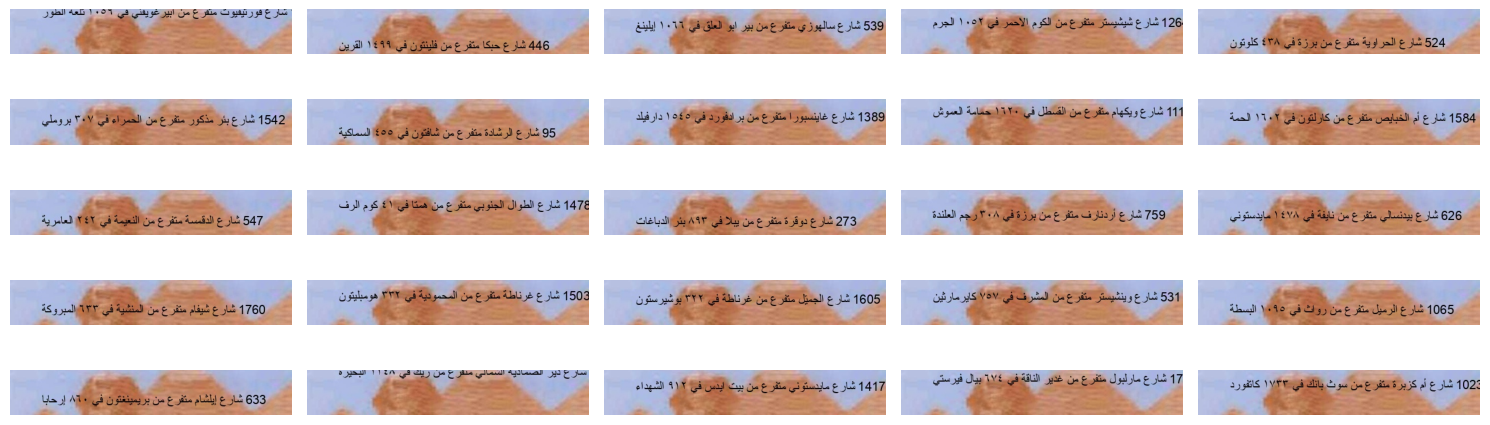

In [ ]:
display_images(X[:25])

In [ ]:
#converting list to numpy array and see the shape
X = np.array(X)
X.shape

(19992, 80, 500, 3)

In [ ]:
#convert txt data list to np.array
y = np.array(y)
y.shape

(19992,)

In [ ]:
#flattten all txt to Extract chars list
flatten_label = " ".join(y)
len(flatten_label)

1034693

In [ ]:
print(flatten_label[:100])

1650 شارع فورتيفيوت متفرع من أبيرغويفني في ١٠٥٩ تلعة الطور 446 شارع حبكا متفرع من فلينتون في ١٤٩٩ ال


In [ ]:
#Get char list
char_list = [*set(flatten_label)]
len(char_list)

64

In [ ]:
char_list

['أ',
 '٠',
 'ؤ',
 'r',
 'د',
 '٧',
 'ى',
 'i',
 'c',
 '٢',
 'ث',
 'ه',
 'ّ',
 '0',
 'ض',
 'غ',
 ' ',
 'ر',
 'ز',
 '3',
 'ء',
 'ظ',
 '6',
 'ب',
 'ن',
 '٤',
 'b',
 '٩',
 '٦',
 '7',
 'و',
 'ت',
 'إ',
 'ج',
 '9',
 'A',
 '1',
 'ئ',
 'ع',
 'ط',
 '8',
 'a',
 '٣',
 '١',
 'خ',
 'م',
 'س',
 'ف',
 'ا',
 '٥',
 'ك',
 'ة',
 '4',
 'ح',
 'ذ',
 'ú',
 'ق',
 'ش',
 '2',
 '٨',
 '5',
 'ي',
 'ص',
 'ل']

In [ ]:
IMG_WIDTH = 256
IMG_HEIGHT = 50

def preprocess_image(img):
    # Resize
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    # Convert to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Normalize to [0,1]
    img = img.astype(np.float32) / 255.0
    # Add channel dimension
    img = np.expand_dims(img, axis=-1)
    return img

In [ ]:
X_proc = np.array([preprocess_image(img) for img in X])

In [ ]:
X_proc.shape


(19992, 50, 256, 1)

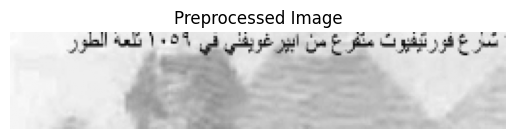

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_proc[0].squeeze(), cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()

In [ ]:
flatten_label = " ".join(y)
char_list = sorted(list(set(flatten_label)))
print(f"Unique characters ({len(char_list)}):", char_list)

# Shift indices by 1 to reserve 0 for the CTC blank token
char_to_idx = {char: idx + 1 for idx, char in enumerate(char_list)}
char_to_idx[''] = 0 # Assign 0 to the blank token

idx_to_char = {idx: char for char, idx in char_to_idx.items()}

Unique characters (64): [' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'a', 'b', 'c', 'i', 'r', 'ú', 'ء', 'أ', 'ؤ', 'إ', 'ئ', 'ا', 'ب', 'ة', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ى', 'ي', 'ّ', '٠', '١', '٢', '٣', '٤', '٥', '٦', '٧', '٨', '٩']


In [ ]:
def encode_label(text):
    return [char_to_idx[char] for char in text]

In [ ]:
y_encoded = [encode_label(label) for label in y]

In [ ]:
import json

with open('char_to_idx.json', 'w', encoding='utf-8') as f:
    json.dump(char_to_idx, f, ensure_ascii=False)

with open('idx_to_char.json', 'w', encoding='utf-8') as f:
    json.dump(idx_to_char, f, ensure_ascii=False)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_label_len = max([len(seq) for seq in y_encoded])
y_padded = pad_sequences(y_encoded, maxlen=max_label_len, padding='post', value=0)
print("y_padded shape:", y_padded.shape)

y_padded shape: (19992, 77)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_proc, y_padded, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from tensorflow.keras.layers import Lambda
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
IMG_HEIGHT, IMG_WIDTH = 50, 256
inputs = layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 1), name='input_image')

x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D((2, 1))(x)


x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D((2, 1))(x)


x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)

shape = x.shape
# Reshape to (batch, width, height * channels)
x = layers.Reshape((shape[2], shape[1] * shape[3]))(x)

x = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(x)
x = layers.Dropout(0.3)(x)

x = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(x)
x = layers.Dropout(0.3)(x)

x = layers.Dense(len(char_to_idx) + 1, activation='softmax')(x)
model = models.Model(inputs, x)



In [ ]:
labels = layers.Input(name='ground_truth_labels', shape=(max_label_len,), dtype='int32')
input_length = layers.Input(name='input_length', shape=(1,), dtype='int32')
label_length = layers.Input(name='label_length', shape=(1,), dtype='int32')


In [ ]:
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    return tf.keras.backend.ctc_batch_cost(labels, y_pred, input_length, label_length)


In [ ]:
loss_out = Lambda(ctc_lambda_func)([model.output, labels, input_length, label_length])
training_model = models.Model([inputs, labels, input_length, label_length], loss_out)
training_model.compile(optimizer='adam', loss=lambda y_true, y_pred: y_pred)

In [ ]:
training_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_image         │ (None, 50, 256,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 50, 256,   │        640 │ input_image[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 25, 256,   │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 25, 256,   │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 256,   │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 256,   │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 12, 256,   │      1,024 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 256, 3072) │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 256, 512)  │  6,817,792 │ reshape[0][0]     │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 512)  │          0 │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 256, 512)  │  1,574,912 │ dropout[0][0]     │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256, 512)  │          0 │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256, 66)   │     33,858 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ground_truth_labels │ (None, 77)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_length        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ label_length        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 1)         │          0 │ dense[0][0],      │
│                     │                   │            │ ground_truth_lab… │
│                     │                   │            │ input_length[0][… │
│                     │                   │            │ label_length[0][… │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 8,797,250 (33.56 MB)

 Trainable params: 8,796,738 (33.56 MB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, Callback

class PrintLossCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}: train_loss={logs['loss']:.4f}, val_loss={logs['val_loss']:.4f}")

checkpoint_filepath = 'best_model.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

print_loss_callback = PrintLossCallback()

In [ ]:
train_input_length = np.array([model.output_shape[1]] * len(X_train))
val_input_length = np.array([model.output_shape[1]] * len(X_val))

train_label_length = np.array([len(label[label != 0]) for label in y_train])
val_label_length = np.array([len(label[label != 0]) for label in y_val])

In [ ]:
history = training_model.fit(
    [X_train, y_train, train_input_length, train_label_length],
    np.zeros(len(X_train)),
    epochs=50,
    batch_size=32,
    validation_data=(
        [X_val, y_val, val_input_length, val_label_length],
        np.zeros(len(X_val))
    ),
    callbacks=[model_checkpoint_callback, print_loss_callback]
)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - loss: 134.1752

Epoch 1: train_loss=103.6143, val_loss=92.9671
500/500 ━━━━━━━━━━━━━━━━━━━━ 200s 375ms/step - loss: 134.1142 - val_loss: 92.9671
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - loss: 90.0951Epoch 2: train_loss=89.2779, val_loss=102.7407
500/500 ━━━━━━━━━━━━━━━━━━━━ 206s 412ms/step - loss: 90.0934 - val_loss: 102.7407
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - loss: 88.1061Epoch 3: train_loss=87.7857, val_loss=139.6455
500/500 ━━━━━━━━━━━━━━━━━━━━ 184s 368ms/step - loss: 88.1054 - val_loss: 139.6455
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 86.3259

Epoch 4: train_loss=85.8812, val_loss=90.4820
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 407ms/step - loss: 86.3250 - val_loss: 90.4820
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 84.8657Epoch 5: train_loss=84.5722, val_loss=113.9412
500/500 ━━━━━━━━━━━━━━━━━━━━ 183s 366ms/step - loss: 84.8651 - val_loss: 113.9412
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 83.7030Epoch 6: train_loss=83.3479, val_loss=119.2419
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 406ms/step - loss: 83.7023 - val_loss: 119.2419
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 82.3715Epoch 7: train_loss=82.2378, val_loss=130.7047
500/500 ━━━━━━━━━━━━━━━━━━━━ 184s 368ms/step - loss: 82.3713 - val_loss: 130.7047
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 81.8038Epoch 8: train_loss=81.8889, val_loss=118.7451
500/500 ━━━━━━━━━━━━━━━━━━━━ 221s 406ms/step - loss: 81.8040 - val_loss: 118.7451
Epoch 9/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 80.8413Epoch 9: tra

Epoch 13: train_loss=74.2153, val_loss=80.4577
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 406ms/step - loss: 74.7137 - val_loss: 80.4577
Epoch 14/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 72.9233

Epoch 14: train_loss=72.8080, val_loss=78.7206
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 406ms/step - loss: 72.9231 - val_loss: 78.7206
Epoch 15/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 71.7434Epoch 15: train_loss=71.4939, val_loss=81.8689
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 406ms/step - loss: 71.7429 - val_loss: 81.8689
Epoch 16/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 70.1883

Epoch 16: train_loss=70.2533, val_loss=77.2256
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 406ms/step - loss: 70.1884 - val_loss: 77.2256
Epoch 17/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 69.2270

Epoch 17: train_loss=68.8957, val_loss=68.6988
500/500 ━━━━━━━━━━━━━━━━━━━━ 184s 367ms/step - loss: 69.2263 - val_loss: 68.6988
Epoch 18/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 68.0669Epoch 18: train_loss=68.0353, val_loss=72.4024
500/500 ━━━━━━━━━━━━━━━━━━━━ 183s 366ms/step - loss: 68.0668 - val_loss: 72.4024
Epoch 19/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - loss: 67.1408Epoch 19: train_loss=66.9431, val_loss=135.9742
500/500 ━━━━━━━━━━━━━━━━━━━━ 183s 366ms/step - loss: 67.1404 - val_loss: 135.9742
Epoch 20/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 66.0192Epoch 20: train_loss=65.8568, val_loss=73.7078
500/500 ━━━━━━━━━━━━━━━━━━━━ 182s 365ms/step - loss: 66.0189 - val_loss: 73.7078
Epoch 21/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 64.8489

Epoch 21: train_loss=64.6861, val_loss=68.2488
500/500 ━━━━━━━━━━━━━━━━━━━━ 184s 367ms/step - loss: 64.8486 - val_loss: 68.2488
Epoch 22/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - loss: 63.5767Epoch 22: train_loss=63.6487, val_loss=126.8692
500/500 ━━━━━━━━━━━━━━━━━━━━ 182s 365ms/step - loss: 63.5769 - val_loss: 126.8692
Epoch 23/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 62.5987

Epoch 23: train_loss=62.4262, val_loss=63.9349
500/500 ━━━━━━━━━━━━━━━━━━━━ 184s 367ms/step - loss: 62.5984 - val_loss: 63.9349
Epoch 24/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - loss: 61.2891

Epoch 24: train_loss=61.0531, val_loss=63.1312
500/500 ━━━━━━━━━━━━━━━━━━━━ 183s 366ms/step - loss: 61.2886 - val_loss: 63.1312
Epoch 25/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 59.5785

Epoch 25: train_loss=59.6922, val_loss=62.7237
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 405ms/step - loss: 59.5787 - val_loss: 62.7237
Epoch 26/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 58.7039

Epoch 26: train_loss=58.4841, val_loss=60.5935
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 405ms/step - loss: 58.7034 - val_loss: 60.5935
Epoch 27/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 57.2654Epoch 27: train_loss=57.4308, val_loss=61.7082
500/500 ━━━━━━━━━━━━━━━━━━━━ 184s 368ms/step - loss: 57.2657 - val_loss: 61.7082
Epoch 28/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 56.4650Epoch 28: train_loss=56.3262, val_loss=95.1673
500/500 ━━━━━━━━━━━━━━━━━━━━ 183s 367ms/step - loss: 56.4647 - val_loss: 95.1673
Epoch 29/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 55.0676Epoch 29: train_loss=55.3905, val_loss=63.7240
500/500 ━━━━━━━━━━━━━━━━━━━━ 184s 368ms/step - loss: 55.0683 - val_loss: 63.7240
Epoch 30/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 53.8372

Epoch 30: train_loss=53.7581, val_loss=56.1565
500/500 ━━━━━━━━━━━━━━━━━━━━ 184s 368ms/step - loss: 53.8371 - val_loss: 56.1565
Epoch 31/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 52.7427Epoch 31: train_loss=52.9124, val_loss=57.6676
500/500 ━━━━━━━━━━━━━━━━━━━━ 184s 368ms/step - loss: 52.7430 - val_loss: 57.6676
Epoch 32/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 51.4834Epoch 32: train_loss=51.6003, val_loss=69.6066
500/500 ━━━━━━━━━━━━━━━━━━━━ 184s 368ms/step - loss: 51.4837 - val_loss: 69.6066
Epoch 33/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 50.5853Epoch 33: train_loss=50.6366, val_loss=56.9229
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 406ms/step - loss: 50.5854 - val_loss: 56.9229
Epoch 34/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 49.5679

Epoch 34: train_loss=49.8733, val_loss=53.5548
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 407ms/step - loss: 49.5685 - val_loss: 53.5548
Epoch 35/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - loss: 48.5804

Epoch 35: train_loss=48.7127, val_loss=51.9773
500/500 ━━━━━━━━━━━━━━━━━━━━ 185s 370ms/step - loss: 48.5807 - val_loss: 51.9773
Epoch 36/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 47.5184

Epoch 36: train_loss=47.5832, val_loss=50.8561
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 406ms/step - loss: 47.5186 - val_loss: 50.8561
Epoch 37/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 46.5156Epoch 37: train_loss=46.7840, val_loss=51.0130
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 406ms/step - loss: 46.5161 - val_loss: 51.0130
Epoch 38/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - loss: 45.5694

Epoch 38: train_loss=45.8486, val_loss=49.7196
500/500 ━━━━━━━━━━━━━━━━━━━━ 184s 369ms/step - loss: 45.5700 - val_loss: 49.7196
Epoch 39/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 44.7945Epoch 39: train_loss=44.9351, val_loss=51.8162
500/500 ━━━━━━━━━━━━━━━━━━━━ 183s 366ms/step - loss: 44.7948 - val_loss: 51.8162
Epoch 40/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 44.3851Epoch 40: train_loss=44.3558, val_loss=49.9462
500/500 ━━━━━━━━━━━━━━━━━━━━ 183s 366ms/step - loss: 44.3851 - val_loss: 49.9462
Epoch 41/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 43.3293Epoch 41: train_loss=43.5363, val_loss=51.9840
500/500 ━━━━━━━━━━━━━━━━━━━━ 184s 367ms/step - loss: 43.3297 - val_loss: 51.9840
Epoch 42/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 42.4520

Epoch 42: train_loss=42.2833, val_loss=46.1794
500/500 ━━━━━━━━━━━━━━━━━━━━ 184s 367ms/step - loss: 42.4517 - val_loss: 46.1794
Epoch 43/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - loss: 41.3939Epoch 43: train_loss=41.3697, val_loss=56.2194
500/500 ━━━━━━━━━━━━━━━━━━━━ 222s 407ms/step - loss: 41.3938 - val_loss: 56.2194
Epoch 44/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 40.2397Epoch 44: train_loss=40.6766, val_loss=53.4452
500/500 ━━━━━━━━━━━━━━━━━━━━ 183s 367ms/step - loss: 40.2406 - val_loss: 53.4452
Epoch 45/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - loss: 40.0563

Epoch 45: train_loss=39.9735, val_loss=44.7385
500/500 ━━━━━━━━━━━━━━━━━━━━ 188s 376ms/step - loss: 40.0561 - val_loss: 44.7385
Epoch 46/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - loss: 38.9088Epoch 46: train_loss=39.1307, val_loss=49.1337
500/500 ━━━━━━━━━━━━━━━━━━━━ 185s 370ms/step - loss: 38.9092 - val_loss: 49.1337
Epoch 47/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 38.8145

Epoch 47: train_loss=38.7153, val_loss=44.3539
500/500 ━━━━━━━━━━━━━━━━━━━━ 184s 368ms/step - loss: 38.8144 - val_loss: 44.3539
Epoch 48/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - loss: 37.4074

Epoch 48: train_loss=37.7768, val_loss=44.2467
500/500 ━━━━━━━━━━━━━━━━━━━━ 184s 368ms/step - loss: 37.4081 - val_loss: 44.2467
Epoch 49/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 36.9326Epoch 49: train_loss=37.0153, val_loss=52.1908
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 407ms/step - loss: 36.9328 - val_loss: 52.1908
Epoch 50/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - loss: 36.2655

Epoch 50: train_loss=36.4657, val_loss=43.0356
500/500 ━━━━━━━━━━━━━━━━━━━━ 184s 369ms/step - loss: 36.2659 - val_loss: 43.0356


In [ ]:
from tensorflow.keras.backend import ctc_decode

model.load_weights("best_model.h5")
print("Best model weights loaded.")

Best model weights loaded.


In [ ]:
y_pred = model.predict(X_val)

# Decode predictions using CTC decoding
decoded_pred, _ = ctc_decode(
    y_pred,
    input_length=np.ones(y_pred.shape[0]) * y_pred.shape[1],
    greedy=True
)

125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step


In [ ]:
def decode_to_text(decoded_seq):
    if not isinstance(decoded_seq, np.ndarray):
        decoded_seq = decoded_seq.numpy()
    return ''.join([idx_to_char.get(idx, '') for idx in decoded_seq if idx > 0])

# Print sample predictions
print("\nSample Predictions from the Best Model:")
for i in range(10):
    true_label = decode_to_text(y_val[i])
    predicted_label = decode_to_text(decoded_pred[0][i])
    print("True Label:    ", true_label)
    print("Predicted Text:", predicted_label)
    print("---")


Sample Predictions from the Best Model:
True Label:     922 شارع أم زيتونة متفرع من الحرث في ١٠١١ باعون
Predicted Text: 346 شارع أو زيتونة متفرع من الحرث في ١٠١١ هيتون
---
True Label:     1134 شارع غارتون متفرع من هاميلتون في ٤٢١ الثمد
Predicted Text: 1006 شارع كارتون متفرع من هالايتون في ٤٠١ المد
---
True Label:     206 شارع بانغور متفرع من الطنيب في ٣٤٧ مايدينهيد
Predicted Text: 346 شارع بالبور متفرع من الجيب في ٣٤٧ شيلتينغام
---
True Label:     1206 شارع السلطاني متفرع من غريت مالفيرن في ٥٣٣ بوارهيلس
Predicted Text: 1006 شارع العساب متفرع من غريت ميتن في ٥٦٣ برسايس
---
True Label:     1438 شارع راسون متفرع من كúيل راثاين في ٢٠٥ بورنيموث
Predicted Text: 1006 شارع والتون متفرع من مشي أب تن في ٢٠٥ بوموث
---
True Label:     1296 شارع أبسر متفرع من مقلع الخزنة في ١٠١ النبي يوشع
Predicted Text: 1006 شارع أسس متفرع من خلع الخزونة في ١٠١ النبيرهوش
---
True Label:     993 شارع الدامخي متفرع من نيو كيلباتريك في ١٧٥٤ العراقين
Predicted Text: 346 شارع البممي متفرع من بيت فيلري في ١١٥٤ الزرمين


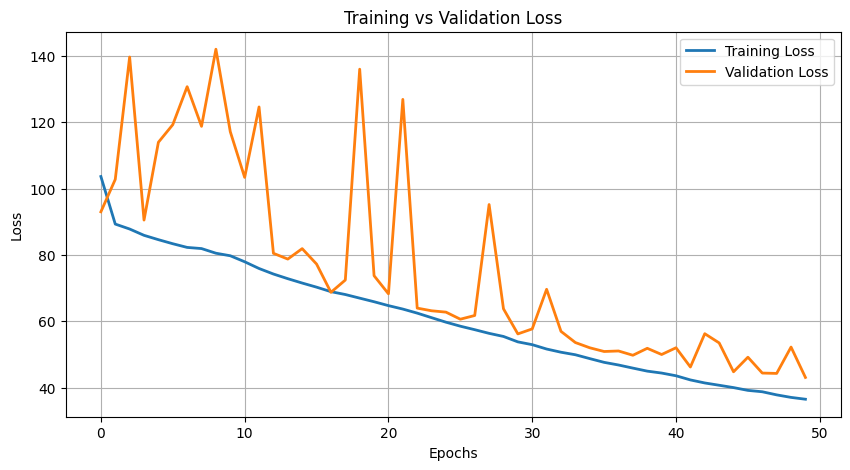

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Decode all ground truth labels
y_true_texts = [decode_to_text(seq) for seq in y_val]

# Decode all predicted labels
y_pred_texts = [decode_to_text(seq) for seq in decoded_pred[0]]

print("Sample GT vs Pred:")
for i in range(5):
    print("GT :", y_true_texts[i])
    print("PR :", y_pred_texts[i])
    print("----")

Sample GT vs Pred:
GT : 922 شارع أم زيتونة متفرع من الحرث في ١٠١١ باعون
PR : 346 شارع أو زيتونة متفرع من الحرث في ١٠١١ هيتون
----
GT : 1134 شارع غارتون متفرع من هاميلتون في ٤٢١ الثمد
PR : 1006 شارع كارتون متفرع من هالايتون في ٤٠١ المد
----
GT : 206 شارع بانغور متفرع من الطنيب في ٣٤٧ مايدينهيد
PR : 346 شارع بالبور متفرع من الجيب في ٣٤٧ شيلتينغام
----
GT : 1206 شارع السلطاني متفرع من غريت مالفيرن في ٥٣٣ بوارهيلس
PR : 1006 شارع العساب متفرع من غريت ميتن في ٥٦٣ برسايس
----
GT : 1438 شارع راسون متفرع من كúيل راثاين في ٢٠٥ بورنيموث
PR : 1006 شارع والتون متفرع من مشي أب تن في ٢٠٥ بوموث
----


In [ ]:
import editdistance
import numpy as np

def cer(true_texts, pred_texts):
    total_edits = 0
    total_chars = 0

    for gt, pr in zip(true_texts, pred_texts):
        total_edits += editdistance.eval(gt, pr)
        total_chars += len(gt)

    return total_edits / total_chars

CER = cer(y_true_texts, y_pred_texts)
print("Character Error Rate (CER):", CER)

Character Error Rate (CER): 0.2628438356973704


In [ ]:
def wer(true_texts, pred_texts):
    total_edits = 0
    total_words = 0

    for gt, pr in zip(true_texts, pred_texts):
        gt_words = gt.split()
        pr_words = pr.split()
        total_edits += editdistance.eval(gt_words, pr_words)
        total_words += len(gt_words)

    return total_edits / total_words

WER = wer(y_true_texts, y_pred_texts)
print("Word Error Rate (WER):", WER)

Word Error Rate (WER): 0.5236983659799046


In [ ]:
def sequence_accuracy(true_texts, pred_texts):
    correct = 0
    for gt, pr in zip(true_texts, pred_texts):
        if gt == pr:
            correct += 1
    return correct / len(true_texts)

ACC = sequence_accuracy(y_true_texts, y_pred_texts)
print("Exact Match Accuracy:", ACC)

Exact Match Accuracy: 0.0


In [ ]:
import pickle

# Store everything needed to fully restore the model
model_data = {
    "model_config": model.to_json(),     # architecture
    "model_weights": model.get_weights(), # weights
    "char_to_idx": char_to_idx,
    "idx_to_char": idx_to_char,
    "max_label_len": max_label_len,
    "img_width": IMG_WIDTH,
    "img_height": IMG_HEIGHT
}

with open("ocr_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

print("Model saved successfully as ocr_model.pkl")

Model saved successfully as ocr_model.pkl
